In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
import pandas as pd

 ## Задание 1
Вычислите производную функции: 
        
        tg^2(sin(x) + cos(2x+3))
        
        в точке x_0=1

In [ ]:
x = sym.Symbol('x')

In [ ]:
y = sym.tan(sym.sin(x) + sym.cos(2*x+3))**2
y

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
res = y.diff(x)
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
der= res.evalf(subs={x: 1})
der

55.3859176353379

##Задание 2
Дан объект в 2D пространстве

(-200.0, 200.0)

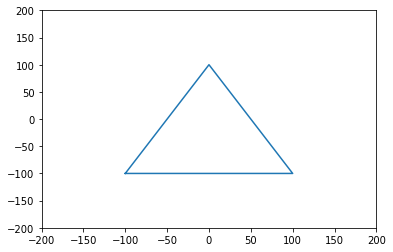

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

In [ ]:
B = np.array([[0.5, 0, 0],
              [0, 1.2, 0],
              [0, 0, 1]])

In [ ]:
res = B@A.transpose()

In [ ]:
res = res.transpose()

(-200.0, 200.0)

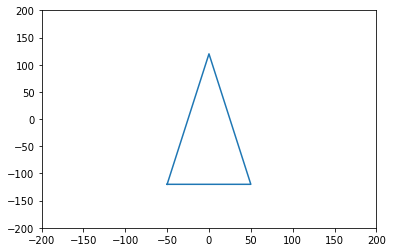

In [ ]:
x = res[:,0]
y = res[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
Z = np.array([[1, 0, 200],
              [0, 1, 300],
              [0, 0, 1]])

In [ ]:
res2 = Z@res.transpose()

In [ ]:
res2 = res2.transpose()

(100.0, 500.0)

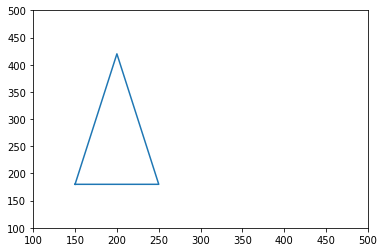

In [ ]:
x1 = res2[:,0]
y2 = res2[:,1]
plt.plot(x1, y2)
plt.ylim([100, 500])
plt.xlim([100, 500])

#Задание 3
Найдите собственные значения и собственные вектора матрицы:


```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [ ]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [ ]:
w,v = np.linalg.eig(m) # собственные значения матрицы
print(w, '- собственные значения матрицы''\n' , v , '-собственные вектора матрицы')

[ 3. -1.] - собственные значения матрицы
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]] -собственные вектора матрицы


#Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

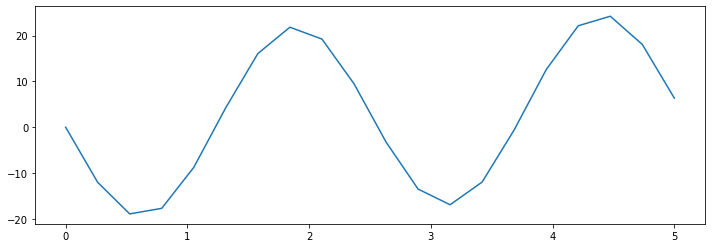

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
res = curve_fit(f, x, fx, p0=[0,2], method='lm')
res

(array([ 3. , -2.5]), array([[ 2.68953111e-18, -5.23196243e-20],
        [-5.23196243e-20,  2.80481709e-19]]))

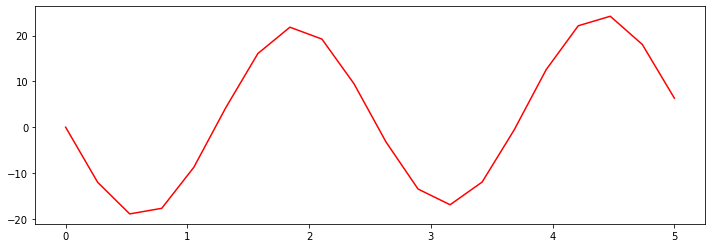

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

In [ ]:
result_m = minimize(error, res[0],  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 3.        , -2.5       ],
       [ 3.00000021, -2.50000007],
       [ 3.00000039, -2.49999996]]), array([1.53652308e-06, 6.94244169e-05, 1.00642249e-04]))
           fun: 1.5365230785491235e-06
       message: 'Optimization terminated successfully.'
          nfev: 81
           nit: 40
        status: 0
       success: True
             x: array([ 3. , -2.5])

#Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


```
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
```
Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).


In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
df = pd.DataFrame()

In [ ]:
for id,user in enumerate(raitings):
  for id_,next_user in enumerate(raitings):
    if (user&next_user).all() == False:
      result = np.dot(user, next_user)/(np.linalg.norm(user)*np.linalg.norm(next_user))
      row = {'id': id, 'values': user,'id_': id_, 'values_': next_user,'cosine_similarity':result}
      df = pd.concat([df, pd.DataFrame([row])])


In [ ]:
max_cos = df.sort_values(by='cosine_similarity', ascending=False).drop_duplicates(subset='id')
max_cos

,id,values,id_,values_,cosine_similarity
0,2,"[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.918731
0,9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",2,"[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6]",0.918731
0,8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0,"[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]",0.910660
0,0,"[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]",8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0.910660
0,4,"[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]",8,"[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]",0.879485
0,1,"[9, 2, 5, 10, 7, 8, 10, 5, 6, 2, 1, 6, 8, 9, 7]",4,"[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]",0.871381
0,3,"[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.858869
0,5,"[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]",9,"[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]",0.855149
0,7,"[4, 1, 6, 4, 3, 10, 4, 4, 2, 8, 7, 9, 3, 8, 3]",5,"[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]",0.844517
0,6,"[9, 8, 4, 8, 8, 10, 6, 1, 1, 2, 9, 5, 2, 7, 2]",3,"[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]",0.832742
